# Chapter 56: Linear Discriminant Analysis

### This code generates figures 3, 4, 5, 9, and 10 in Chapter 56: Linear Disciminant Analysis (vol. III)


#### Runs simulations for Examples 1, 3, and 4 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:

1. scipy.io
2. numpy
3. matplotlib.pyplpot

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## Example 56.1 (Application to the Iris dataset)

We illustrate the operation of the LDA classifier by applying it to the iris dataset, which we encountered earlier in Examples 27.4 and 32.7. The dataset consists of three types of flowers: setosa, versicolor, and virginica. We denote the three classes by $r=1,2,3$, respectively. There are 50 measurements for each flower type, and each measurement consists of four attributes: petal length, petal width, sepal length, and sepal width (all measured in centimeters).

We select $N=120$ measurements randomly, along with their corresponding labels, for training and keep the remaining $T=30$ measurements and their labels for testing.  Figure 56.3 displays the scatter diagrams for sepal width $\times$ sepal length and petal width $\times$ petal length for the training and test data points for the three classes of flowers.



In [2]:
# LDA and MDC applied to the Iris data

data = scipy.io.loadmat('./data/iris_data') # loaded into variable data

Ntotal = 150 # total number of data points
features = data['A'][0:Ntotal, 0:4] # each row is a feature vector with 4 attributes (petal length, petal width, sepal length, sepal width)
labels = data['A'][0:Ntotal, 4] # entry entry is 0=setosa, 1=versicolor, 2=virginia

R = 3 # number of classes
M = 4 # feature size
N = 120 # training data points
Nprime = Ntotal - N # test data points

indx = np.random.permutation(Ntotal) # generates N random integers to select which data to use for training


features_train = np.zeros((N, features.shape[1]))
labels_train = np.zeros((N,))

# training data
for u in range(N):
    n = indx[u]
    features_train[u, :] = features[n, :]
    labels_train[u] = labels[n]
    
features_test = np.zeros((Ntotal-N, features.shape[1]))
labels_test = np.zeros((Ntotal-N,))
# test data
m = -1

for u in range(Ntotal-N):
    m = m + 1
    n = indx[u]
    features_test[m, :] = features[n, :]
    labels_test[m] = labels[n]

    
N_0 = 0
N_1 = 0
N_2 = 0

features_0 = np.array([])
features_1 = np.array([])
features_2 = np.array([])

# training data
for n in range(N):
    if labels_train[n] == 0:
        N_0 = N_0 + 1
        if features_0.shape[0] == 0:
            features_0 = np.append(features_0, features_train[n,:])  
        else:    
            features_0 = np.vstack((features_0, features_train[n, :]))   
    
    elif labels_train[n] == 1:
        N_1 = N_1 + 1
        if features_1.shape[0] == 0:
            features_1 = np.append(features_1, features_train[n,:])  
        else:    
            features_1 = np.vstack((features_1, features_train[n, :]))   
    
    elif labels_train[n] == 2:
        N_2 = N_2 + 1
        if features_2.shape[0] == 0:
            features_2 = np.append(features_2, features_train[n,:])  
        else:    
            features_2 = np.vstack((features_2, features_train[n, :]))   
    
        

In [4]:
pi_0 = (N_0+1)/(N+R)
pi_1 = (N_1+1)/(N+R)
pi_2 = (N_2+1)/(N+R)

mean_0 = np.mean(features_0, axis = 0)
mean_1 = np.mean(features_1, axis = 0)
mean_2 = np.mean(features_2, axis = 0)

Sigma_0 = 0
for r in range(N_0):
    Sigma_0 = Sigma_0 + np.matmul((features_0[r, :] - mean_0).reshape(-1, 1), (features_0[r, :] - mean_0).reshape(-1, 1).T)
    
Sigma_0 = Sigma_0/(N_0-1)

Sigma_1 = 0
for r in range(N_1):
    Sigma_1 = Sigma_1 + np.matmul((features_1[r, :] - mean_1).reshape(-1, 1), (features_1[r, :] - mean_1).reshape(-1, 1).T)
    
Sigma_1 = Sigma_1/(N_1-1)

Sigma_2 = 0
for r in range(N_2):
    Sigma_2 = Sigma_2 + np.matmul((features_2[r, :] - mean_2).reshape(-1, 1), (features_2[r, :] - mean_2).reshape(-1, 1).T)
    
Sigma_2 = Sigma_2/(N_2-1)

Sigma = (1/(N-R))*((N_0-1)*Sigma_0 + (N_1-1)*Sigma_1 + (N_2-1)*Sigma_2)

invSigma = np.linalg.inv(Sigma)

In [5]:
# LDA performance on test data

labels_test_prediction = np.zeros((Nprime,))

for n in range(Nprime):
    h = features_test[n, :]
    d0 = np.matmul(np.matmul(h, invSigma), mean_0.T) - 0.5 * np.matmul(np.matmul(mean_0, invSigma), mean_0.T) + np.log(pi_0)
    d1 = np.matmul(np.matmul(h, invSigma), mean_1.T) - 0.5 * np.matmul(np.matmul(mean_1, invSigma), mean_1.T) + np.log(pi_1)
    d2 = np.matmul(np.matmul(h, invSigma), mean_2.T) - 0.5 * np.matmul(np.matmul(mean_2, invSigma), mean_2.T) + np.log(pi_2)
    
    a = np.max([d0, d1, d2])
    rhat = np.argmax([d0, d1, d2])
    rstar = rhat # transform to labels 0, 1 and 2
    labels_test_prediction[n] = rstar
    
    
x = np.absolute(labels_test-labels_test_prediction)
a = x[x!=0] # nonzero entries will become one
print('LDA empirical error on test data (%)')
empirical_error = (a.size/Nprime)*100
print(empirical_error)

LDA empirical error on test data (%)
3.3333333333333335


In [6]:
# LDA performance on training data
labels_train_prediction = np.zeros((N,))

for n in range(N):
    h = features_train[n, :]
    d0 = np.matmul(np.matmul(h, invSigma), mean_0.T) - 0.5 * np.matmul(np.matmul(mean_0, invSigma), mean_0.T) + np.log(pi_0)
    d1 = np.matmul(np.matmul(h, invSigma), mean_1.T) - 0.5 * np.matmul(np.matmul(mean_1, invSigma), mean_1.T) + np.log(pi_1)
    d2 = np.matmul(np.matmul(h, invSigma), mean_2.T) - 0.5 * np.matmul(np.matmul(mean_2, invSigma), mean_2.T) + np.log(pi_2)
    
    a = np.max([d0, d1, d2])
    rhat = np.argmax([d0, d1, d2])
    rstar = rhat # transform to labels 0, 1 and 2
    labels_train_prediction[n] = rstar
    
xx = np.absolute(labels_train-labels_train_prediction)
aa = xx[xx!=0] # nonzero entries will become one
print('LDA empirical error on training data (%)')
empirical_error = (aa.size/N)*100
print(empirical_error)

LDA empirical error on training data (%)
1.6666666666666667


In [7]:
# MDC (minimum distance classifier) performance on test data

labels_test_MDC = np.zeros((Nprime,))

for n in range(Nprime):
    h = features_test[n, :]
    d0 = np.matmul(np.matmul(h-mean_0, invSigma), (h-mean_0).T) 
    d1 = np.matmul(np.matmul(h-mean_1, invSigma), (h-mean_1).T) 
    d2 = np.matmul(np.matmul(h-mean_2, invSigma), (h-mean_2).T) 
    
    a = np.min([d0, d1, d2])
    rhat = np.argmin([d0, d1, d2])
    rstar = rhat # transform to labels 0, 1 and 2
    labels_test_MDC[n] = rstar
    
x = np.absolute(labels_test-labels_test_MDC)
amdc = x[x!=0] # nonzero entries will become one
print('MDC empirical error on test data (%)')
empirical_error = (amdc.size/Nprime)*100
print(empirical_error)

MDC empirical error on test data (%)
3.3333333333333335


In [8]:
# MDC (minimum distance classifier) performance on training data

labels_train_MDC = np.zeros((N,))

for n in range(N):
    h = features_train[n, :]
    d0 = np.matmul(np.matmul(h-mean_0, invSigma), (h-mean_0).T) 
    d1 = np.matmul(np.matmul(h-mean_1, invSigma), (h-mean_1).T) 
    d2 = np.matmul(np.matmul(h-mean_2, invSigma), (h-mean_2).T) 
    
    a = np.min([d0, d1, d2])
    rhat = np.argmin([d0, d1, d2])
    rstar = rhat # transform to labels 0, 1 and 2
    labels_train_MDC[n] = rstar
    

xx = np.absolute(labels_train-labels_train_MDC)
aamdc = xx[xx!=0] #  nonzero entries will become one
print('MDC empirical error on training data (%)')
empirical_error = (aamdc.size/N)*100
print(empirical_error)


MDC empirical error on training data (%)
1.6666666666666667


In [9]:
print('prior probabilities')
print([pi_0, pi_1, pi_2])

print('means over classes')
print(mean_0)
print(mean_1)
print(mean_2)

print('variances over classes')
print(Sigma_0)
print(Sigma_1)
print(Sigma_2)

print('pooled variance')
print(Sigma)

S3 = 50


prior probabilities
[0.3252032520325203, 0.3170731707317073, 0.35772357723577236]
means over classes
[4.94358974 3.36410256 1.46666667 0.24615385]
[5.86052632 2.77894737 4.19473684 1.32368421]
[6.60232558 2.96046512 5.55581395 2.01627907]
variances over classes
[[0.11041835 0.08002699 0.01885965 0.0105668 ]
 [0.08002699 0.11762483 0.01140351 0.00906883]
 [0.01885965 0.01140351 0.03122807 0.00578947]
 [0.0105668  0.00906883 0.00578947 0.01149798]]
[[0.27272404 0.11184922 0.19438122 0.0652845 ]
 [0.11184922 0.10549075 0.10961593 0.05105263]
 [0.19438122 0.10961593 0.23078236 0.08256046]
 [0.0652845  0.05105263 0.08256046 0.04401849]]
[[0.43928018 0.10199889 0.33748616 0.0571041 ]
 [0.10199889 0.10816168 0.07773533 0.05208749]
 [0.33748616 0.07773533 0.34204873 0.05573643]
 [0.0571041  0.05208749 0.05573643 0.0837763 ]]
pooled variance
[[0.27979876 0.09797778 0.18874522 0.04457638]
 [0.09797778 0.11039053 0.06627356 0.03778835]
 [0.18874522 0.06627356 0.20591163 0.04799715]
 [0.04457638 0

In [10]:
Nt_0 = 0
Nt_1 = 0
Nt_2 = 0

features_t0 = np.array([])
features_t1 = np.array([])
features_t2 = np.array([])

# test data for plotting

for n in range(Nprime):
    if labels_test[n] == 0:
        Nt_0 = Nt_0 + 1
        if features_t0.shape[0] == 0:
            features_t0 = np.append(features_t0, features_test[n,:])  
        else:    
            features_t0 = np.vstack((features_t0, features_test[n, :]))   
    
    elif labels_test[n] == 1:
        Nt_1 = Nt_1 + 1
        if features_t1.shape[0] == 0:
            features_t1 = np.append(features_t1, features_test[n,:])  
        else:    
            features_t1 = np.vstack((features_t1, features_test[n, :]))   
    
    elif labels_test[n] == 2:
        Nt_2 = Nt_2 + 1
        if features_t2.shape[0] == 0:
            features_t2 = np.append(features_t2, features_test[n,:])  
        else:    
            features_t2 = np.vstack((features_t2, features_test[n, :]))   
    
        

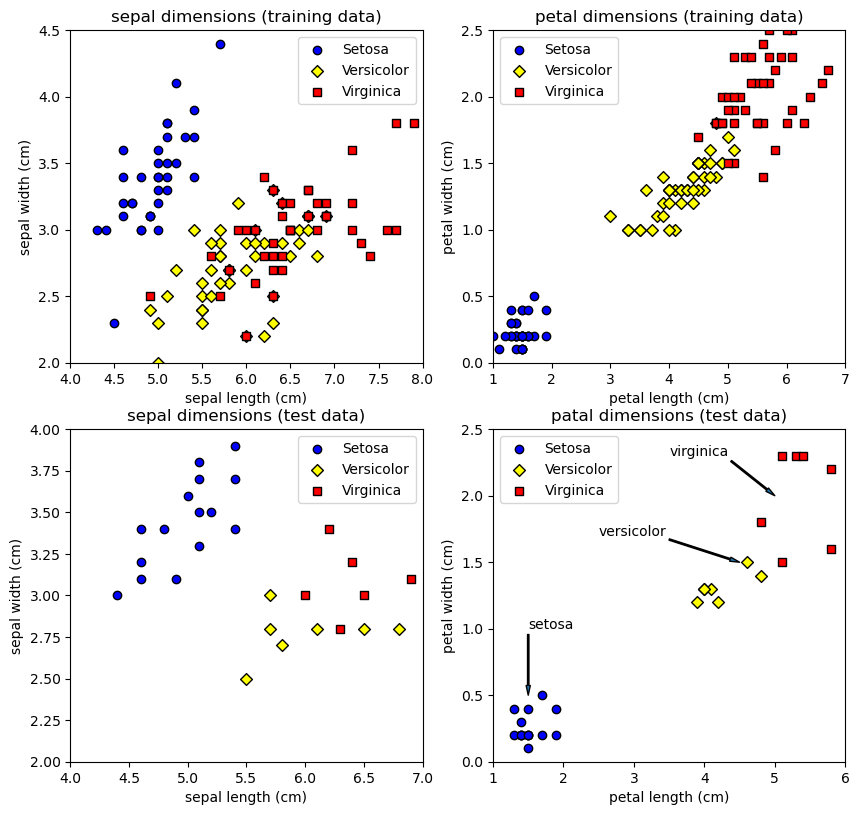

In [10]:
# figure 3 (scatter diagrams)

f1, axs1 =  plt.subplots(2, 2, figsize=(10,9.5))

axs1[0][0].scatter(features_0[:, 0], features_0[:, 1], marker='o', c = 'blue',edgecolors='black')
axs1[0][0].scatter(features_1[:, 0], features_1[:, 1], marker='D',c = 'yellow',edgecolors='black')
axs1[0][0].scatter(features_2[:, 0], features_2[:, 1], marker='s',c = 'red',edgecolors='black')
axs1[0][0].set_ylabel('sepal width (cm)')
axs1[0][0].set_xlabel('sepal length (cm)')
axs1[0][0].set_title('sepal dimensions (training data)')
axs1[0][0].legend(['Setosa','Versicolor','Virginica'])
axs1[0][0].set_xlim([4, 8])
axs1[0][0].set_ylim([2, 4.5])


axs1[0][1].scatter(features_0[:, 2], features_0[:, 3], marker='o', c = 'blue',edgecolors='black')
axs1[0][1].scatter(features_1[:, 2], features_1[:, 3], marker='D', c = 'yellow',edgecolors='black')
axs1[0][1].scatter(features_2[:, 2], features_2[:, 3], marker='s', c = 'red',edgecolors='black')
axs1[0][1].set_ylabel('petal width (cm)')
axs1[0][1].set_xlabel('petal length (cm)')
axs1[0][1].set_title('petal dimensions (training data)')
axs1[0][1].legend(['Setosa','Versicolor','Virginica'])
axs1[0][1].set_xlim([1, 7])
axs1[0][1].set_ylim([0, 2.5])

axs1[1][0].scatter(features_t0[:, 0], features_t0[:, 1], marker='o', c = 'blue',edgecolors='black')
axs1[1][0].scatter(features_t1[:, 0], features_t1[:, 1], marker='D', c = 'yellow',edgecolors='black')
axs1[1][0].scatter(features_t2[:, 0], features_t2[:, 1], marker='s', c = 'red',edgecolors='black')
axs1[1][0].set_ylabel('sepal width (cm)')
axs1[1][0].set_xlabel('sepal length (cm)')
axs1[1][0].set_title('sepal dimensions (test data)')
axs1[1][0].legend(['Setosa','Versicolor','Virginica'])
axs1[1][0].set_xlim([4, 7])
axs1[1][0].set_ylim([2, 4])


axs1[1][1].scatter(features_t0[:, 2], features_t0[:, 3], marker='o', c = 'blue',edgecolors='black')
axs1[1][1].scatter(features_t1[:, 2], features_t1[:, 3], marker='D', c = 'yellow',edgecolors='black')
axs1[1][1].scatter(features_t2[:, 2], features_t2[:, 3], marker='s', c = 'red',edgecolors='black')
axs1[1][1].set_ylabel('petal width (cm)')
axs1[1][1].set_xlabel('petal length (cm)')
axs1[1][1].set_title('patal dimensions (test data)')
axs1[1][1].legend(['Setosa','Versicolor','Virginica']);
axs1[1][1].annotate('setosa',xy=(1.5,0.5),xytext=(1.5,1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('versicolor',xy=(4.5,1.5),xytext=(2.5,1.7),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('virginica',xy=(5,2),xytext=(3.5,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].set_xlim([1, 6])
axs1[1][1].set_ylim([0, 2.5]);

#plt.savefig('fig 56.3.pdf')

**Figure 56.3** Scatter diagrams showing sepal width  $\times$  sepal length and petal width  $\times$  petal length for the training ($top$ $row$) and test ($bottom$ $row$) data points. The iris dataset is available from https://archive.ics.uci.edu/ml/datasets/iris. 

We apply the LDA procedure (56.11) with $R=3$ to the training data and estimate the following prior probabilities:

$$
\widehat{\pi}_1=0.3089,\;\;\;\widehat{\pi}_2=0.3252,\;\;\;\;\widehat{\pi}_3=0.3659 \tag{56.18}
$$

We also determine the mean vectors

$$
\widehat{m}_1=\begin{bmatrix}
05.0216\\
3.4324\\
1.4946\\
0.2405
\end{bmatrix} \quad
\widehat{m}_2 = \begin{bmatrix}
05.8718\\
2.7538\\
4.2359\\
1.3051
\end{bmatrix} \quad
\widehat{m}_3 = \begin{bmatrix}
06.6341\\
3.0091\\
5.6159\\
2.0477
\end{bmatrix} \tag{56.19}
$$


and covariance matrices

$$
\widehat{\Sigma}_1=\begin{bmatrix}
00.1195 &   0.0940  &  0.0154    &0.0124\\
0.0940 &   0.1278 &   0.0113  &  0.0128\\
0.0154 &   0.0113 &   0.0255  &  0.0061\\
0.0124 &   0.0128  &  0.0061  &  0.0130
\end{bmatrix} \tag{56.20a}
$$

$$
\widehat{\Sigma}_2=\begin{bmatrix}
00.2531 &   0.0805  &  0.1758  &  0.0517\\
0.0805 &   0.0989  &  0.0928  &  0.0468\\
0.1758 &   0.0928  &  0.2150  &  0.0735\\
0.0517 &   0.0468  &  0.0735  &  0.0410
\end{bmatrix} \tag{56.20b}
$$

$$
\widehat{\Sigma}_3=\begin{bmatrix}
00.2716 &   0.0879  &  0.1750   & 0.0357\\
0.0879 &   0.1064  &  0.0582   & 0.0336\\
0.1750 &   0.0582  &  0.1867   & 0.0419\\
0.0357 &   0.0336  &  0.0419   & 0.0444
\end{bmatrix} \tag{56.20c}
$$

Using these quantities, we estimate the class variables for all test data points. The results are shown in Fig. 56.4. We obtained one misclassification over $T=30$ test points, resulting in an error rate of $3.33\%$. The misclassified data point from the versicolor class is indicated by an arrow in the lower plots of the figure; it is classified erroneously as belonging to the virginica class. 


In [11]:
# predicted labels for test data for plotting

Nt_0 = 0
Nt_1 = 0
Nt_2 = 0

features_t0_prediction = np.array([])
features_t1_prediction = np.array([])
features_t2_prediction = np.array([])

for n in range(Nprime):
    if labels_test_prediction[n] == 0:
        Nt_0 = Nt_0 + 1
        if features_t0_prediction.shape[0] == 0:
            features_t0_prediction = np.append(features_t0_prediction, features_test[n,:])  
        else:    
            features_t0_prediction = np.vstack((features_t0_prediction, features_test[n, :]))   
    
    elif labels_test_prediction[n] == 1:
        Nt_1 = Nt_1 + 1
        if features_t1_prediction.shape[0] == 0:
            features_t1_prediction = np.append(features_t1_prediction, features_test[n,:])  
        else:    
            features_t1_prediction = np.vstack((features_t1_prediction, features_test[n, :]))   
    
    elif labels_test_prediction[n] == 2:
        Nt_2 = Nt_2 + 1
        if features_t2_prediction.shape[0] == 0:
            features_t2_prediction = np.append(features_t2_prediction, features_test[n,:])  
        else:    
            features_t2_prediction = np.vstack((features_t2_prediction, features_test[n, :]))   
    
        

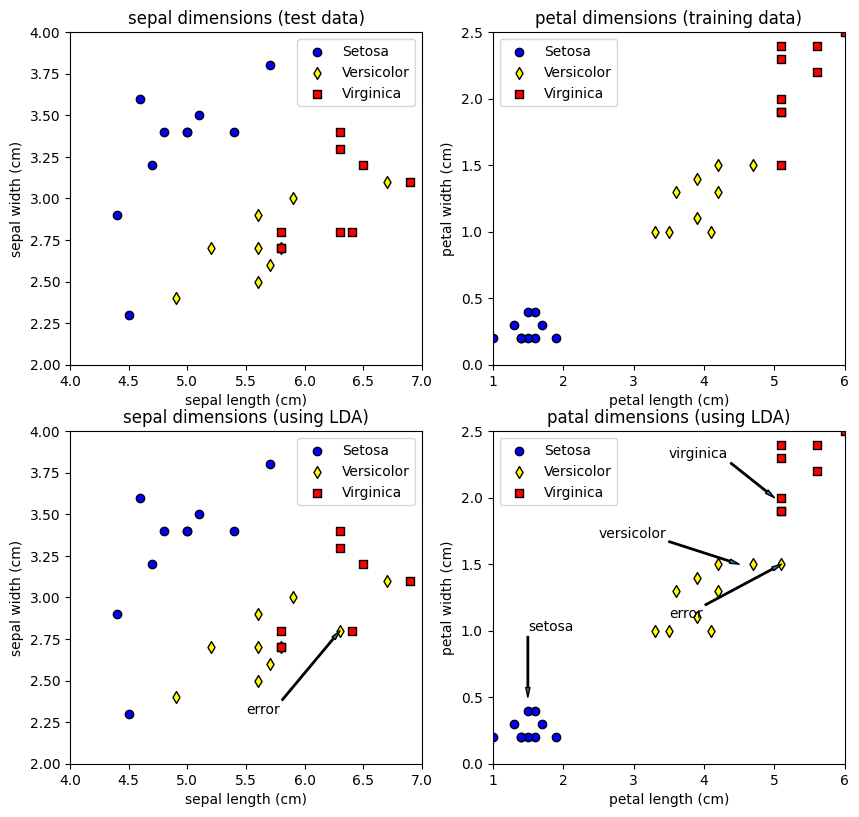

In [14]:
# figure 4 (scatter diagrams)

f1, axs1 =  plt.subplots(2, 2, figsize=(10,9.5))

axs1[0][0].scatter(features_t0[:, 0], features_t0[:, 1], c = 'blue',edgecolors='black')
axs1[0][0].scatter(features_t1[:, 0], features_t1[:, 1], c = 'yellow',edgecolors='black', marker="d")
axs1[0][0].scatter(features_t2[:, 0], features_t2[:, 1], c = 'red',edgecolors='black', marker="s")
axs1[0][0].set_ylabel('sepal width (cm)')
axs1[0][0].set_xlabel('sepal length (cm)')
axs1[0][0].set_title('sepal dimensions (test data)')
axs1[0][0].legend(['Setosa','Versicolor','Virginica'])
axs1[0][0].set_xlim([4, 7])
axs1[0][0].set_ylim([2, 4])


axs1[0][1].scatter(features_t0[:, 2], features_t0[:, 3], c = 'blue',edgecolors='black')
axs1[0][1].scatter(features_t1[:, 2], features_t1[:, 3], c = 'yellow',edgecolors='black', marker="d")
axs1[0][1].scatter(features_t2[:, 2], features_t2[:, 3], c = 'red',edgecolors='black', marker="s")
axs1[0][1].set_ylabel('petal width (cm)')
axs1[0][1].set_xlabel('petal length (cm)')
axs1[0][1].set_title('petal dimensions (training data)')
axs1[0][1].legend(['Setosa','Versicolor','Virginica'])
axs1[0][1].set_xlim([1, 6])
axs1[0][1].set_ylim([0, 2.5])

axs1[1][0].scatter(features_t0_prediction[:, 0], features_t0_prediction[:, 1], c = 'blue',edgecolors='black')
axs1[1][0].scatter(features_t1_prediction[:, 0], features_t1_prediction[:, 1], c = 'yellow',edgecolors='black', marker="d")
axs1[1][0].scatter(features_t2_prediction[:, 0], features_t2_prediction[:, 1], c = 'red',edgecolors='black', marker="s")
axs1[1][0].set_ylabel('sepal width (cm)')
axs1[1][0].set_xlabel('sepal length (cm)')
axs1[1][0].set_title('sepal dimensions (using LDA)')
axs1[1][0].legend(['Setosa','Versicolor','Virginica'])
axs1[1][0].set_xlim([4, 7])
axs1[1][0].set_ylim([2, 4])
index = np.where((labels_test==labels_test_prediction)==False)[0][0]
feature_error = features_test[index]
axs1[1][0].annotate('error',xy=(feature_error[0],feature_error[1]),xytext=(5.5,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});


axs1[1][1].scatter(features_t0_prediction[:, 2], features_t0_prediction[:, 3], c = 'blue',edgecolors='black')
axs1[1][1].scatter(features_t1_prediction[:, 2], features_t1_prediction[:, 3], c = 'yellow',edgecolors='black', marker="d")
axs1[1][1].scatter(features_t2_prediction[:, 2], features_t2_prediction[:, 3], c = 'red',edgecolors='black', marker="s")
axs1[1][1].set_ylabel('petal width (cm)')
axs1[1][1].set_xlabel('petal length (cm)')
axs1[1][1].set_title('patal dimensions (using LDA)')
axs1[1][1].legend(['Setosa','Versicolor','Virginica']);
axs1[1][1].set_xlim([1, 6])
axs1[1][1].set_ylim([0, 2.5])
axs1[1][1].annotate('error',xy=(feature_error[2],feature_error[3]),xytext=(3.5,1.1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('setosa',xy=(1.5,0.5),xytext=(1.5,1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('versicolor',xy=(4.5,1.5),xytext=(2.5,1.7),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('virginica',xy=(5,2),xytext=(3.5,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('figs/fig 56.4.pdf')

**Figure 56.4** Scatter diagrams showing sepal width  $\times$  sepal length and petal width  $\times$  petal length for the test data points for the three classes of flowers.  ($Bottom$ $row$) Classification results for these same test points using the LDA classifier. It is observed that a single point is misclassified.

We further apply the MDC procedure (56.17) to the same iris dataset and  estimate the class variables for the same test points. The results are shown in Fig. 56.5. We again obtain the same  misclassification resulting in an error rate of $3.33\%$. 

In [15]:
Nt_0 = 0
Nt_1 = 0
Nt_2 = 0

# predicted labels for test data for plotting

features_t0_MDC = np.array([])
features_t1_MDC = np.array([])
features_t2_MDC = np.array([])

for n in range(Nprime):
    if labels_test_MDC[n] == 0:
        Nt_0 = Nt_0 + 1
        if features_t0_MDC.shape[0] == 0:
            features_t0_MDC = np.append(features_t0_MDC, features_test[n,:])  
        else:    
            features_t0_MDC = np.vstack((features_t0_MDC, features_test[n, :]))   
    
    elif labels_test_MDC[n] == 1:
        Nt_1 = Nt_1 + 1
        if features_t1_MDC.shape[0] == 0:
            features_t1_MDC = np.append(features_t1_MDC, features_test[n,:])  
        else:    
            features_t1_MDC = np.vstack((features_t1_MDC, features_test[n, :]))   
    
    elif labels_test_MDC[n] == 2:
        Nt_2 = Nt_2 + 1
        if features_t2_MDC.shape[0] == 0:
            features_t2_MDC = np.append(features_t2_MDC, features_test[n,:])  
        else:    
            features_t2_MDC = np.vstack((features_t2_MDC, features_test[n, :]))   
    
        

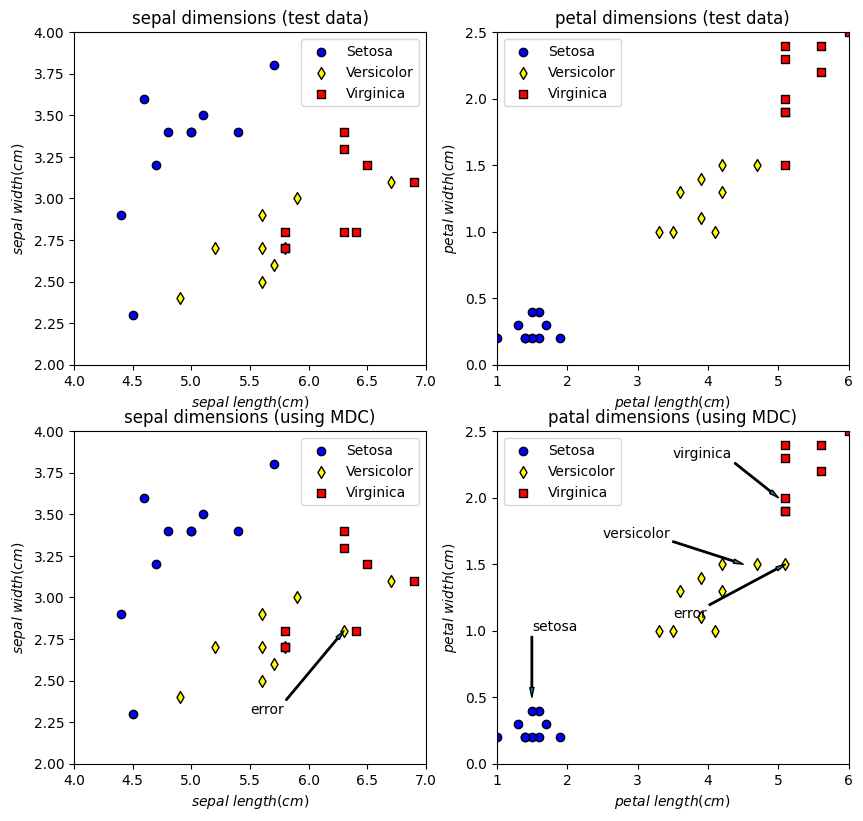

In [17]:
# figure 5 (scatter diagrams)

f1, axs1 =  plt.subplots(2, 2, figsize=(10,9.5))

axs1[0][0].scatter(features_t0[:, 0], features_t0[:, 1], c = 'blue',edgecolors='black')
axs1[0][0].scatter(features_t1[:, 0], features_t1[:, 1], c = 'yellow',edgecolors='black', marker="d")
axs1[0][0].scatter(features_t2[:, 0], features_t2[:, 1], c = 'red',edgecolors='black', marker="s")
axs1[0][0].set_ylabel('$sepal$ $width (cm)$')
axs1[0][0].set_xlabel('$sepal$ $length (cm)$')
axs1[0][0].set_title('sepal dimensions (test data)')
axs1[0][0].legend(['Setosa','Versicolor','Virginica'])
axs1[0][0].set_xlim([4, 7])
axs1[0][0].set_ylim([2, 4])



axs1[0][1].scatter(features_t0[:, 2], features_t0[:, 3], c = 'blue',edgecolors='black')
axs1[0][1].scatter(features_t1[:, 2], features_t1[:, 3], c = 'yellow',edgecolors='black', marker="d")
axs1[0][1].scatter(features_t2[:, 2], features_t2[:, 3], c = 'red',edgecolors='black', marker="s")
axs1[0][1].set_ylabel('$petal$ $width (cm)$')
axs1[0][1].set_xlabel('$petal$ $length (cm)$')
axs1[0][1].set_title('petal dimensions (test data)')
axs1[0][1].legend(['Setosa','Versicolor','Virginica'])
axs1[0][1].set_xlim([1, 6])
axs1[0][1].set_ylim([0, 2.5])


axs1[1][0].scatter(features_t0_MDC[:, 0], features_t0_MDC[:, 1], c = 'blue',edgecolors='black')
axs1[1][0].scatter(features_t1_MDC[:, 0], features_t1_MDC[:, 1], c = 'yellow',edgecolors='black', marker="d")
axs1[1][0].scatter(features_t2_MDC[:, 0], features_t2_MDC[:, 1], c = 'red',edgecolors='black', marker="s")
axs1[1][0].set_ylabel('$sepal$ $width (cm)$')
axs1[1][0].set_xlabel('$sepal$ $length (cm)$')
axs1[1][0].set_title('sepal dimensions (using MDC)')
axs1[1][0].legend(['Setosa','Versicolor','Virginica'])
axs1[1][0].set_xlim([4, 7])
axs1[1][0].set_ylim([2, 4])
index = np.where((labels_test==labels_test_MDC)==False)[0][0]
feature_error = features_test[index]
axs1[1][0].annotate('error',xy=(feature_error[0],feature_error[1]),xytext=(5.5,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});


axs1[1][1].scatter(features_t0_MDC[:, 2], features_t0_MDC[:, 3], c = 'blue',edgecolors='black')
axs1[1][1].scatter(features_t1_MDC[:, 2], features_t1_MDC[:, 3], c = 'yellow',edgecolors='black', marker="d")
axs1[1][1].scatter(features_t2_MDC[:, 2], features_t2_MDC[:, 3], c = 'red',edgecolors='black', marker="s")
axs1[1][1].set_ylabel('$petal$ $width (cm)$')
axs1[1][1].set_xlabel('$petal$ $length (cm)$')
axs1[1][1].set_title('patal dimensions (using MDC)')
axs1[1][1].legend(['Setosa','Versicolor','Virginica']);
axs1[1][1].set_xlim([1, 6])
axs1[1][1].set_ylim([0, 2.5])
axs1[1][1].annotate('error',xy=(feature_error[2],feature_error[3]),xytext=(3.5,1.1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('setosa',xy=(1.5,0.5),xytext=(1.5,1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('versicolor',xy=(4.5,1.5),xytext=(2.5,1.7),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1][1].annotate('virginica',xy=(5,2),xytext=(3.5,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('figs/fig 56.5.pdf')

**Figure 56.5** Scatter diagrams showing sepal width  $\times$  sepal length and petal width  $\times$  petal length for the test data points for the three classes of flowers.  ($Bottom row$) Classification results for these same test points using the MDC classifier. It is observed that a single point is misclassified.

## Example 56.3 (Numerical example in $R^2$)

In Fig 56.9 we show a collection of $120$ feature points $h_n\in R^{2}$ whose classes $\gamma(n)\in\{\pm 1\}$ are known beforehand. We  use the data to compute the parameters $\{w^{\star},\theta^{\star}\}$ for the separating line $h^{\sf T} w^{\star}-\theta^{\star}=0$ using the FDA procedure (56.34). For illustration purposes, in the figure, we show the feature vectors $h_n$ from classes $\pm 1$ projected onto the Fisher direction $w^{\star}$. As explained before, these projections are given by

$$
\widehat{h}_n=\frac{h_n^{\sf T} w^{\star}}{\|w^{\star}\|^2} w^{\star} \tag{56.41}
$$

We also show the separating line (which is normal to the Fisher direction $w^{\star}$).

In [18]:
data = scipy.io.loadmat('./data/linearly_separable_data') # loads a matrix A2; each row is h with 2 features plus class +1 or -1
C2 = data['A2'][:, 2] # this column contains the label variables gammathis column contains the label variables gamma

A2 = data['A2'] 

# Running FDA on the linearly separable data A2
N = np.max(A2.shape) # total number of data points
N_test = np.fix(0.2*N) # number of test data separated for testing (20%)
A2_train = A2[0:int(N-N_test), :]
N_train = np.max(A2_train.shape)
A2_test = A2[int(N-N_test):, :]

x = A2_train[:, 0]
y = A2_train[:, 1]
gamma = A2_train [:, 2]
N = np.max(gamma.shape)

min_x = np.min(x)
min_y = np.min(y)
max_x = np.max(x)
max_y = np.max(y)

xtr = np.zeros((N_train,))
ytr = np.zeros((N_train,))
xtg = np.zeros((N_train,))
ytg = np.zeros((N_train,))

hat_m_1 = np.zeros((2,))
hat_m_2 = np.zeros((2,))
Sigma_1 = np.zeros((2,2))
Sigma_2 = np.zeros((2,2))
Ng = 0
Nr = 0

for m in range(N): # assigning classes 1, 2 or 3 to these 100 points
    if gamma[m] == 1:
        xtg[m] = x[m] # class +1 will be colored green
        ytg[m] = y[m]
        hat_m_1[0] = hat_m_1[0] + x[m]
        hat_m_1[1] = hat_m_1[1] + y[m]
        Ng = Ng + 1
    else:
        xtr[m] = x[m] # class -1 will be colored red
        ytr[m] = y[m]
        hat_m_2[0] = hat_m_2[0] + x[m]
        hat_m_2[1] = hat_m_2[1] + y[m]
        Nr = Nr + 1
        
C = A2_train[:, 2] # color map

In [ ]:
hat_m_1 = hat_m_1/Ng
hat_m_2 = hat_m_2/Nr

Sigma_1 = np.zeros((2, 2))
Sigma = np.zeros((2, 2))

for m in range(Ng):
    h1 = np.array([xtg[m], ytg[m]])
    Sigma_1 = Sigma_1 + np.matmul((h1-hat_m_1).reshape(-1, 1), (h1-hat_m_1).reshape(-1, 1).T) 
    
    
Sigma_1 = Sigma_1/(Ng-1)


for m in range(Nr):
    h2 = np.array([xtr[m], ytr[m]])
    Sigma_2 = Sigma_2 + np.matmul((h2-hat_m_2).reshape(-1, 1), (h2-hat_m_2).reshape(-1, 1).T) 
    
    
Sigma_2 = Sigma_2/(Nr-1)
Sigma = (1/(N_train-2)) * ((Ng-1)*Sigma_1 + (Nr-1)*Sigma_2)
wo = np.matmul(np.linalg.inv(Sigma), (hat_m_1-hat_m_2).reshape(1, -1).T)
thetao = 0.5 * np.matmul((hat_m_1+hat_m_2), wo.reshape(1, -1).T)

xg = np.zeros((Ng,))
yg = np.zeros((Ng,))
xr = np.zeros((Nr,))
yr = np.zeros((Nr,))

for n in range(Ng):
    h = np.array([xtg[n], ytg[n]])
    proj = ((np.matmul(h.reshape(1, -1), wo))/(np.linalg.norm(wo)**2)) * wo
    xg[n] = proj[0] # green point
    yg[n] = proj[1]
    
    
for n in range(Nr):
    h = np.array([xtr[n], ytr[n]])
    proj = ((np.matmul(h.reshape(1, -1), wo))/(np.linalg.norm(wo)**2)) * wo
    xr[n] = proj[0] # green point
    yr[n] = proj[1]

In [20]:
w = np.array([-thetao[0], wo[0][0] , wo[1][0]])

# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0
 
k = 0
a = np.arange(-4, 4.1, 0.1).shape[0]
h2 = np.zeros((a,))
h3 = np.zeros((a,))

for z in np.arange(-4, 4.1, 0.1):
    h2[k] = z
    h3[k] = (-w[0] - h2[k] * w[1])/w[2]
    k = k + 1
    
h22 = h2
h33 = h3

In [21]:
w = np.array([wo[0][0] , wo[1][0]])

#  equation of projection line is w_1h_2 -w_2h_1=0

k = 0
a = np.arange(-4, 4.1, 0.1).shape[0]
h2 = np.zeros((a,))
h3 = np.zeros((a,))

for z in np.arange(-4, 4.1, 0.1):
    h2[k] = z
    h3[k] = (w[1]*h2[k])/w[0]
    k = k + 1
    


In [28]:
C_string = np.zeros(C.shape).astype(str)
C_string[C == 1] = "green"
C_string[C == -1] = "red"

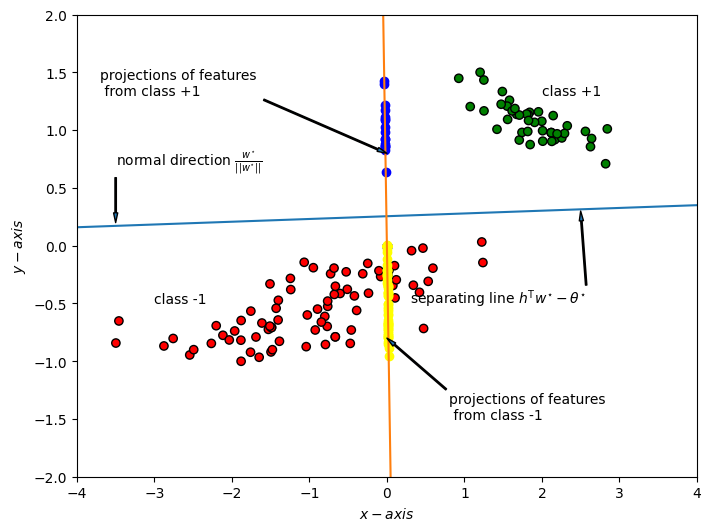

In [30]:
f1, axs1 =  plt.subplots(1, 1, figsize=(8,6))

axs1.scatter(A2_train[:, 0], A2_train[:, 1], c = C_string, edgecolors='black')
axs1.scatter(xg, yg, c = 'blue')
axs1.scatter(xr, yr, c = 'yellow')
axs1.plot(h22, h33)
axs1.plot(h2, h3)
axs1.set_ylabel(r'$y-axis$')
axs1.set_xlabel(r'$x-axis$')
axs1.set_ylim(-2, 2)
axs1.set_xlim(-4, 4);
axs1.annotate(r'normal direction $\frac{w^{\star}}{||w^{\star}||}$',xy=(-3.5,0.2),xytext=(-3.5,0.7),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('projections of features \n from class +1',xy=(0,0.8),xytext=(-3.7,1.3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate('projections of features \n from class -1',xy=(0,-0.8),xytext=(0.8,-1.5),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1.annotate(r'class -1',xy=(-2.5,-0.2),xytext=(-3,-0.5));
axs1.annotate(r'class +1',xy=(-3.5,0.2),xytext=(2,1.3));
axs1.annotate(r'separating line $h^{\sf T} w^{\star}-\theta^{\star}$',xy=(2.5,0.3),xytext=(0.3,-0.5),arrowprops={"width":1,"headwidth":3,'headlength':7});

plt.savefig('figs/fig 56.9.pdf')

**Figure 56.9** The figure shows the projected features onto the Fisher direction $w^{\star}$ obtained according to the FDA construction (56.34). It is seen that the projected values separate well into two clusters.

## Example 56.4 ( Application to iris dataset)

We apply the FDA procedure (56.44) to the same iris dataset from Examples 56.1. We use the procedure to reduce the dimension of the feature vectors from $M=4$ down to $M'=2$. We obtain the following values for the mean vector parameters:


$$
\widehat{m}_1=\begin{bmatrix}
05.0060 \\   3.4180   \\ 1.4640  \\  0.2440
\end{bmatrix}
\qquad
\widehat{m}_2=\begin{bmatrix}
05.9360 \\   2.7700  \\  4.2600\\ 1.3260
\end{bmatrix}
\qquad
\widehat{m}_3=\begin{bmatrix}
06.5880  \\  2.9740 \\   5.5520 \\   2.0260
\end{bmatrix}
\qquad
\widehat{m}_W=\begin{bmatrix}
05.8433 \\   3.0540 \\   3.7587 \\   1.1987
\end{bmatrix}
\tag{56.47}
$$


and covariance matrices parameters:

$$
\widehat{\Sigma}_1=\begin{bmatrix}
00.1242 &   0.1003  &  0.0161  &  0.0105\\
0.1003 &   0.1452  &  0.0117  &  0.0114\\
0.0161 &   0.0117  &  0.0301  &  0.0057\\
0.0105 &   0.0114  &  0.0057  &  0.0115
\end{bmatrix}
\tag{56.46a}
$$

$$
\widehat{\Sigma}_2=\begin{bmatrix}
00.2664 &   0.0852  &  0.1829 &  0.0558\\
0.0852 &   0.0985  &  0.0827 &   0.0412\\
0.1829 &   0.0827  &  0.2208 &  0.0731\\
0.0558 &   0.0412  &  0.0731 &  0.0391
\end{bmatrix} \tag{56.46b}
$$

$$
\widehat{\Sigma}_3=\begin{bmatrix}
00.4043 &   0.0938  &  0.3033  &  0.0491\\
0.0938 &   0.1040  &  0.0714  &  0.0476\\
0.3033 &   0.0714  &  0.3046  &  0.0488\\
0.0491 &   0.0476  &  0.0488  &  0.0754
\end{bmatrix} \tag{56.46c}
$$

$$
\widehat{\Sigma}_W=\begin{bmatrix}
00.2650 &   0.0931  &  0.1674  &  0.0385\\
0.0931 &   0.1159  &  0.0552  &  0.0334\\
0.1674 &   0.0552  &  0.1852  &  0.0425\\
0.0385 &  0.0334   & 0.0425   & 0.0420
\end{bmatrix} \tag{56.46d}
$$

$$
\widehat{\Sigma}_B=\begin{bmatrix}
00.4214&   -0.1302 &   1.1011  &  0.4758\\
-0.1302 &   0.0732 &  -0.3737 &  -0.1499\\
1.1011  & -0.3737  &  2.9110  &  1.2461\\
0.4758  & -0.1499  &  1.2461  &  0.5374
\end{bmatrix} \tag{56.46e}
$$

These parameters lead to the $4\times 2$ weight matrix

$$
W^{\star}=\begin{bmatrix}
-0.2049 &   0.0090\\
-0.3871 &   0.5890\\
0.5465  & -0.2543\\
0.7138  &  0.7670
\end{bmatrix} \tag{56.47}
$$

We apply this matrix to the four-dimensional features vectors $h_n$ and transform them into the two-dimensional features $z_n$. The scatter diagram for these reduced features is shown in the top plot of Fig. 56.10. 




In [31]:
# FDA applied to Iris data to perform dimensionality reduction

data = scipy.io.loadmat('./data/iris_data') # loaded into variable data

Ntotal = 150 # total number of data points
features = data['A'][0:Ntotal, 0:4] # each row is a feature vector with 4 attributes (petal length, petal width, sepal length, sepal width)
labels = data['A'][0:Ntotal, 4] # entry entry is 0=setosa, 1=versicolor, 2=virginia

R = 3 # classes
M = 4 # feature size
N = 150 # training data points

N_0 = 0
N_1 = 0
N_2 = 0


features_0 = np.array([])
features_1 = np.array([])
features_2 = np.array([])

for n in range(N):
    if labels[n] == 0:
        N_0 = N_0 + 1
        if features_0.shape[0] == 0:
            features_0 = np.append(features_0, features[n,:])  
        else:    
            features_0 = np.vstack((features_0, features[n, :]))   
    
    elif labels[n] == 1:
        N_1 = N_1 + 1
        if features_1.shape[0] == 0:
            features_1 = np.append(features_1, features[n,:])  
        else:    
            features_1 = np.vstack((features_1, features[n, :]))   
    
    elif labels[n] == 2:
        N_2 = N_2 + 1
        if features_2.shape[0] == 0:
            features_2 = np.append(features_2, features[n,:])  
        else:    
            features_2 = np.vstack((features_2, features[n, :]))   
    
        

mean_0 = np.mean(features_0, axis = 0)
mean_1 = np.mean(features_1, axis = 0)
mean_2 = np.mean(features_2, axis = 0)

mean_hat = (N_0*mean_0 + N_1*mean_1 + N_2*mean_2)/N

Sigma_0 = 0
for r in range(N_0):
    Sigma_0 = Sigma_0 + np.matmul((features_0[r, :] - mean_0).reshape(-1, 1), (features_0[r, :] - mean_0).reshape(-1, 1).T)
    
Sigma_0 = Sigma_0/(N_0-1)

Sigma_1 = 0
for r in range(N_1):
    Sigma_1 = Sigma_1 + np.matmul((features_1[r, :] - mean_1).reshape(-1, 1), (features_1[r, :] - mean_1).reshape(-1, 1).T)
    
Sigma_1 = Sigma_1/(N_1-1)

Sigma_2 = 0
for r in range(N_2):
    Sigma_2 = Sigma_2 + np.matmul((features_2[r, :] - mean_2).reshape(-1, 1), (features_2[r, :] - mean_2).reshape(-1, 1).T)
    
Sigma_2 = Sigma_2/(N_2-1)

Sigma_W = (1/(N-R))*((N_0-1)*Sigma_0 + (N_1-1)*Sigma_1 + (N_2-1)*Sigma_2)


X = (N_0-1)*np.matmul((mean_0-mean_hat).reshape(1, -1).T, (mean_0-mean_hat).reshape(1, -1))
X = X + (N_1-1)*np.matmul((mean_1-mean_hat).reshape(1, -1).T, (mean_1-mean_hat).reshape(1, -1))
X = X + (N_2-1)*np.matmul((mean_2-mean_hat).reshape(1, -1).T, (mean_2-mean_hat).reshape(1, -1))

Sigma_B = (1/(N-R))*X

Mprime = 2 # reduce from dimenion M=4 down to M'=2
X = np.matmul((np.linalg.inv(Sigma_W)), Sigma_B)
D, V = np.linalg.eig(X) # eigenvalues in D appear in decreasing order
Wstar = V[:, 0:Mprime] # leading M' columns

Wstar[:, 0] = -Wstar[:, 0] 

print('means in FDA for dimensionality reduction')
print(mean_0)
print(mean_1)
print(mean_2)
print(mean_hat)

print('variances in FDA for dimensionality reduction')
print(Sigma_0)
print(Sigma_1)
print(Sigma_2)
print(Sigma_W)
print(Sigma_B)

print('Wstar')
print(Wstar)




means in FDA for dimensionality reduction
[5.006 3.418 1.464 0.244]
[5.936 2.77  4.26  1.326]
[6.588 2.974 5.552 2.026]
[5.84333333 3.054      3.75866667 1.19866667]
variances in FDA for dimensionality reduction
[[0.12424898 0.10029796 0.01613878 0.01054694]
 [0.10029796 0.14517959 0.01168163 0.01143673]
 [0.01613878 0.01168163 0.03010612 0.00569796]
 [0.01054694 0.01143673 0.00569796 0.01149388]]
[[0.26643265 0.08518367 0.18289796 0.05577959]
 [0.08518367 0.09846939 0.08265306 0.04120408]
 [0.18289796 0.08265306 0.22081633 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]
[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]
[[0.26500816 0.09308163 0.16744218 0.03847347]
 [0.09308163 0.11588435 0.0552381  0.03342313]
 [0.16744218 0.0552381  0.18517007 0.0425415 ]
 [0.03847347 0.03342313 0.0425415  0.04201088]]
[[ 0.42141422 -0.13022667  1.101

In [32]:
z = np.zeros((2,N));
for n in range(N):
    h = features[n,:].T
    z[:,n] = np.matmul(Wstar.T,h) # feature column in reduced space 


N_0 = 0
N_1 = 0
N_2 = 0


z_0 = np.array([])
z_1 = np.array([])
z_2 = np.array([])

for n in range(N):
    if labels[n] == 0:
        N_0 = N_0 + 1
        if z_0.shape[0] == 0:
            z_0 = np.append(z_0, z[:,n])  
        else:    
            z_0 = np.vstack((z_0, z[:, n]))   
    
    elif labels[n] == 1:
        N_1 = N_1 + 1
        if z_1.shape[0] == 0:
            z_1 = np.append(z_1, z[:,n])  
        else:    
            z_1 = np.vstack((z_1, z[:, n]))   
    
    elif labels[n] == 2:
        N_2 = N_2 + 1
        if z_2.shape[0] == 0:
            z_2 = np.append(z_2, z[:,n])  
        else:    
            z_2 = np.vstack((z_2, z[:, n]))   
    
        



In [33]:
# Let us now separate class 0 from the other two classes.
# Treat the other two classes 1 and 2 together as a new class 3
# So we want to distinguish between classes 0 and 3


N_3 = 0
z_3 = np.array([])

for n in range(N):
    if labels[n] != 0:
        N_3 = N_3 + 1
        if z_3.shape[0] == 0:
            z_3 = np.append(z_3, z[:,n])  
        else:    
            z_3 = np.vstack((z_3, z[:, n]))   
    
        labels[n] = 3
        
mean_0 = np.mean(z_0, axis = 0)
mean_3 = np.mean(z_3, axis = 0)

Sigma_0 = 0
for r in range(N_0):
    Sigma_0 = Sigma_0 + np.matmul((z_0[r, :] - mean_0).reshape(-1, 1), (z_0[r, :] - mean_0).reshape(-1, 1).T)
    
Sigma_0 = Sigma_0/(N_0-1)

Sigma_3 = 0
for r in range(N_3):
    Sigma_3 = Sigma_3 + np.matmul((z_3[r, :] - mean_3).reshape(-1, 1), (z_3[r, :] - mean_3).reshape(-1, 1).T)
    
Sigma_3 = Sigma_3/(N_3-1)


Sigma = (1/(N-2))*((N_0-1)*Sigma_0 + (N_3-1)*Sigma_3)

print('means in FDA for classification')
print(mean_0)
print(mean_3)

print('variances in FDA for classification')
print(Sigma_0)
print(Sigma_3)
print(Sigma)


means in FDA for classification
[ 1.3748206  -1.87304306]
[-1.48232502 -1.78586744]
variances in FDA for classification
[[ 0.04421851 -0.03667183]
 [-0.03667183  0.06482935]]
[[0.32006663 0.10201382]
 [0.10201382 0.10710171]]
[[0.22873854 0.05609762]
 [0.05609762 0.09310613]]


In [34]:
wstar = np.matmul(np.linalg.inv(Sigma), (mean_0-mean_3).T)
thetastar = 0.5 * np.matmul((mean_0 + mean_3), wstar)
w = np.array([-thetastar, wstar[0], wstar[1]])
print('thetastar and wstar')
print('w =')
print(-thetastar)
print(wstar[0])
print(wstar[1])


thetastar and wstar
w =
-17.36315655841668
14.92605320565118
-9.929439335302327


In [35]:
# let w = [-theta w2 w3]',  h = [ 1 h2 h3]
# equation of separating hyperplane is h_2 w_2 + h_3 w_3 - theta = 0

k = 0
h2a = np.zeros((np.arange(-2, 3.1, 0.1).shape[0],))
h3a = np.zeros((np.arange(-2, 3.1, 0.1).shape[0],))

for z in np.arange(-2, 3.1, 0.1):
    h2a[k] = z  
    h3a[k] = (-w[0] - h2a[k]*w[1])/w[2]
    k = k + 1
    

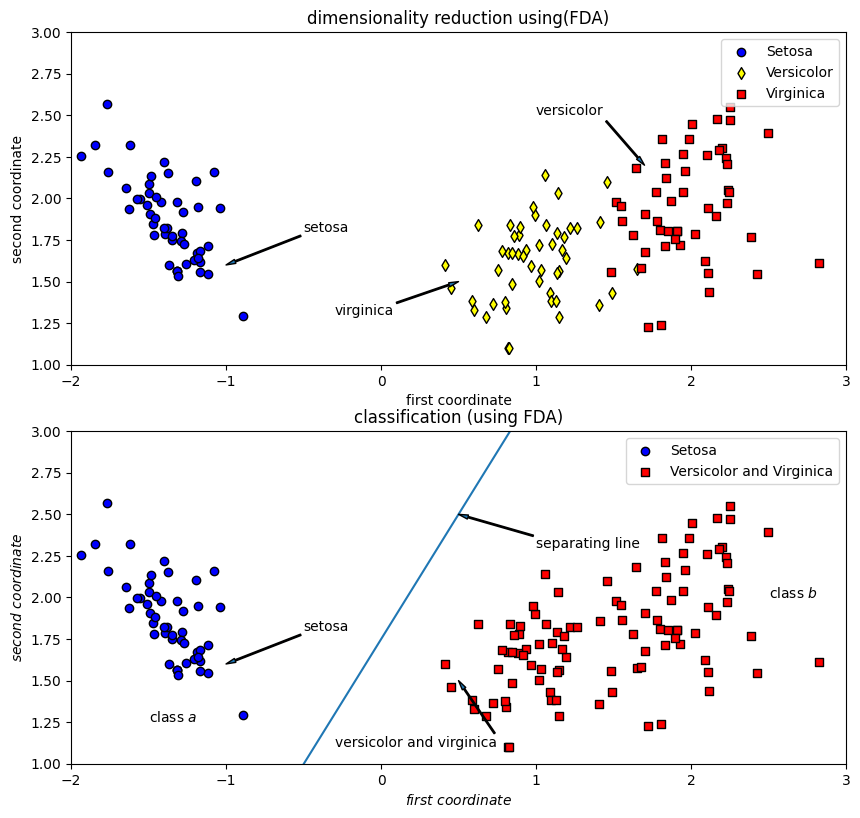

In [36]:
# figure 10 (FDA applied to Iris dataset)

f1, axs1 =  plt.subplots(2, 1, figsize=(10,9.5))

axs1[0].scatter(z_0[:, 0]*-1, z_0[:, 1]*-1, c = 'blue',edgecolors='black')
axs1[0].scatter(z_1[:, 0]*-1, z_1[:, 1]*-1, c = 'yellow',edgecolors='black', marker="d")
axs1[0].scatter(z_2[:, 0]*-1, z_2[:, 1]*-1, c = 'red',edgecolors='black', marker="s")
axs1[0].set_ylabel('second coordinate')
axs1[0].set_xlabel('first coordinate')
axs1[0].set_title('dimensionality reduction using(FDA)')
axs1[0].legend(['Setosa','Versicolor','Virginica'])
axs1[0].set_xlim([-2, 3])
axs1[0].set_ylim([1, 3])
axs1[0].annotate('setosa',xy=(-1,1.6),xytext=(-0.5,1.8),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[0].annotate('versicolor',xy=(1.7,2.2),xytext=(1,2.5),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[0].annotate('virginica',xy=(0.5,1.5),xytext=(-0.3,1.3),arrowprops={"width":1,"headwidth":3,'headlength':7});


axs1[1].scatter(z_0[:, 0]*-1, z_0[:, 1]*-1, c = 'blue',edgecolors='black')
axs1[1].scatter(z_3[:, 0]*-1, z_3[:, 1]*-1, c = 'red',edgecolors='black', marker="s")
axs1[1].set_ylabel('$second$ $coordinate$')
axs1[1].set_xlabel('$first$ $coordinate$')
axs1[1].set_title('classification (using FDA)')
axs1[1].legend(['Setosa','Versicolor and Virginica'])
axs1[1].plot(h2a*-1, h3a*-1);
axs1[1].set_xlim([-2, 3])
axs1[1].set_ylim([1, 3])
axs1[1].annotate('setosa',xy=(-1,1.6),xytext=(-0.5,1.8),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1].annotate('versicolor and virginica',xy=(0.5,1.5),xytext=(-0.3,1.1),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1].annotate('separating line',xy=(0.5,2.5),xytext=(1,2.3),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1].annotate('class $a$',xy=(-1,1.6),xytext=(-1.5,1.25));
axs1[1].annotate('class $b$',xy=(-1,1.6),xytext=(2.5,2));

plt.savefig('figs/fig 56.10.pdf')

**Figure 56.10** Scatter diagram for the $2-$dimensional features $z_n$ obtained after applying the FDA reduction procedure (56.44). ($Bottom plot$) The reduced data $z_n$ is divided into two classes (setosa vs. versicolor+virginica) and the FDA procedure (56.34) is used to determine the parameters for the separating hyperplane.

In the bottom plot of the same figure we apply the FDA procedure (56.34) to the reduced data to discriminate between classes $r=1$ (setosa) and $r\in\{2,3\}$ (versicolor or virginica). We denote these two classes by $a$ and $b$. For this classification problem, we determine the following mean vector values from the reduced features $\{z_n\}$:

$$
\widehat{m}_a=\begin{bmatrix}
0-1.3748  \\  1.8730 
\end{bmatrix}
\qquad
\widehat{m}_b=\begin{bmatrix}
01.4823 \\   1.7859
\end{bmatrix}
\tag{56.48}
$$

as well as the following covariance matrix estimates:

$$
\widehat{\Sigma}_a=\begin{bmatrix}
 00.0442 &  -0.0367\\
-0.0367  &  0.0648
\end{bmatrix} \tag{56.49a}
$$

$$
\widehat{\Sigma}_b=\begin{bmatrix}
00.3201  &  0.1020\\
0.1020  &  0.1071
\end{bmatrix} \tag{56.49b}
$$

$$
\widehat{\Sigma}_=\begin{bmatrix}
00.2287  &  0.0561\\
0.0561  &  0.0931
\end{bmatrix}
\tag{56.49c}
$$

Subsequently, we determine the parameters for the separating line and find that

$$
W^{\star}=\begin{bmatrix}
0-14.9261 \\   9.9294
\end{bmatrix}
\qquad 
theta^{\star}=-17.3632 \tag{56.50}
$$

The lower plot in the figure shows the separating line 

$$
h^{\sf T} w^{\star}-\theta^{\star}=0 \tag{56.51}
$$

and illustrates how the FDA construction (56.34) is able to separate the data into the two classes without errors in this case.